# Data Science Model

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
# Reading prepared data into a dataframe.
df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
df.head()

,CSUSHPISA,Year,Month,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Subsidy
DATE,,,,,,,,,,
2001-01-01,113.491,2001.0,7.0,49774.000000,143.4,4.6,1582.0,3.77,108209.0,20.573
2001-02-01,114.167,2001.0,8.0,49777.000000,143.3,4.9,1615.0,3.65,108209.0,20.573
2001-03-01,114.812,2001.0,9.0,49780.000000,143.0,5.0,1551.0,3.07,108209.0,20.573
2001-04-01,115.310,2001.0,10.0,49783.000000,142.3,5.3,1599.0,2.49,108209.0,20.573
2001-05-01,115.856,2001.0,11.0,49885.666667,142.1,5.5,1555.0,2.09,108209.0,20.573


In [3]:
# Dropping year and month columns
df.drop(columns = ["Year", "Month"], inplace = True)

In [4]:
# Correlation
df.corr()

,CSUSHPISA,Per_Capita_GDP,CPI,UNRATE,Cons_Materials,FEDFUNDS,Num_Households,Subsidy
CSUSHPISA,1.000000,0.909307,0.903790,-0.449580,0.148305,0.076743,0.763321,0.852033
Per_Capita_GDP,0.909307,1.000000,0.921894,-0.398849,-0.140474,-0.137181,0.941977,0.935167
CPI,0.903790,0.921894,1.000000,-0.228784,-0.237420,-0.248833,0.879773,0.936237
UNRATE,-0.449580,-0.398849,-0.228784,1.000000,-0.554817,-0.516847,-0.183644,-0.111146
Cons_Materials,0.148305,-0.140474,-0.237420,-0.554817,1.000000,0.682779,-0.408561,-0.315012
FEDFUNDS,0.076743,-0.137181,-0.248833,-0.516847,0.682779,1.000000,-0.362633,-0.341770
Num_Households,0.763321,0.941977,0.879773,-0.183644,-0.408561,-0.362633,1.000000,0.950142
Subsidy,0.852033,0.935167,0.936237,-0.111146,-0.315012,-0.341770,0.950142,1.000000


In [5]:
# Separating the target variable and the independent variable
y = df.pop("CSUSHPISA")
X = df

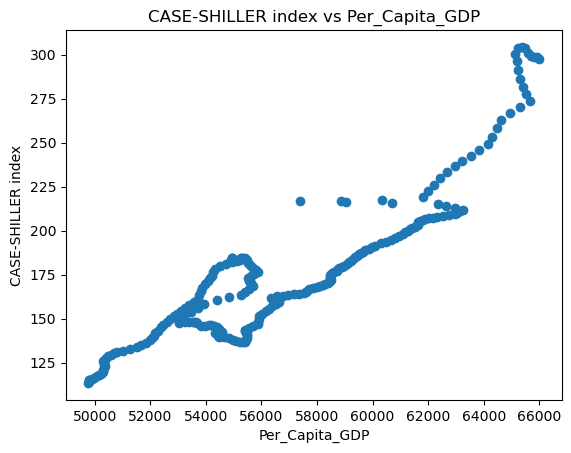

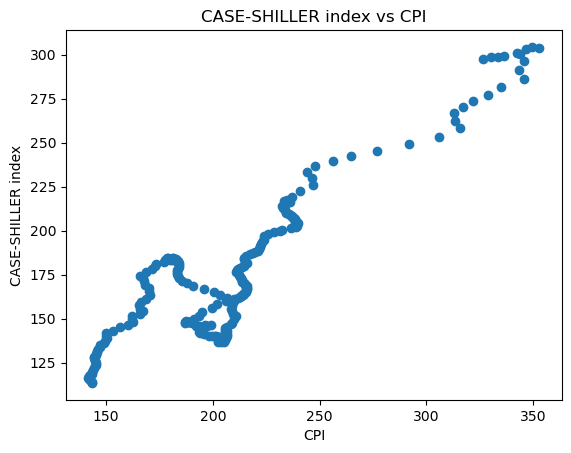

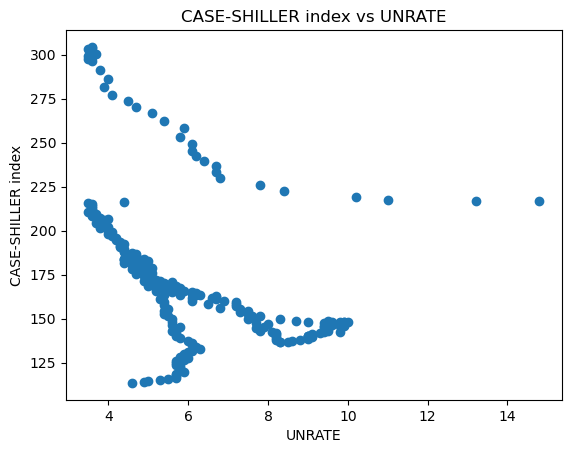

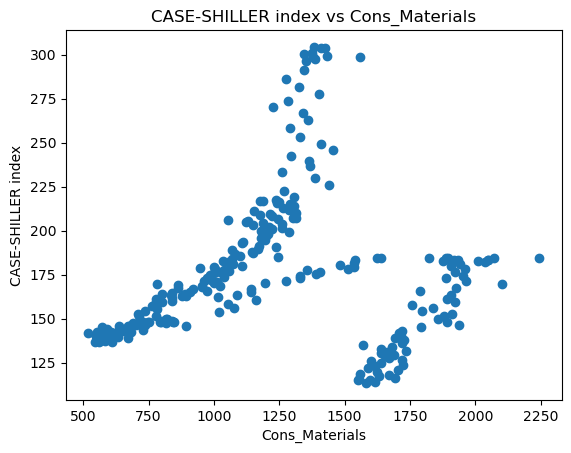

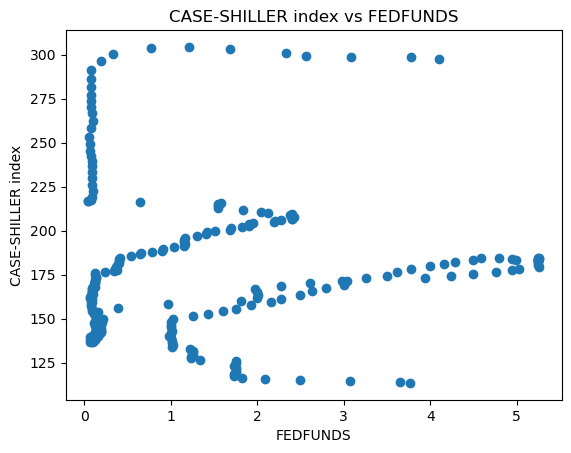

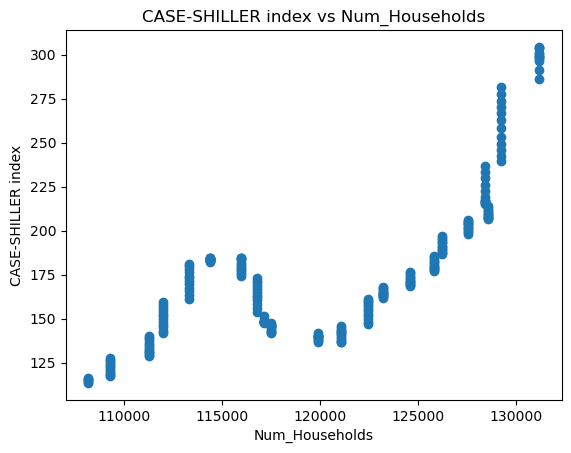

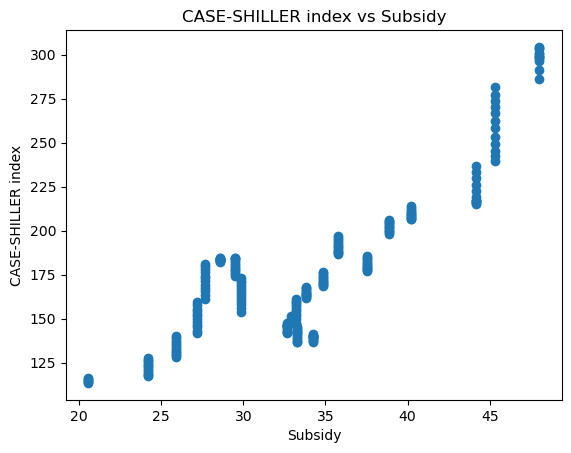

In [ ]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

### CSI vs GDP 
* **Positive Relationship**: Higher Per Capita GDP generally leads to higher home prices.
* **Not a Straight Line**: The increase in home prices isn't always smooth; it sometimes jumps around.
* **Clusters of Data**: Some GDP ranges show a lot of variability in home prices, suggesting other influencing factors.
* **Outliers**: There are some unusual points that don't follow the overall trend.

### CSI vs CPI
* **Positive Relationship**: Higher CPI generally corresponds to higher home prices.
* **Non-linear Pattern**: The increase in home prices relative to CPI is not always smooth and shows some variability.
* **Data Clusters**: Certain CPI ranges exhibit a lot of variation in home prices, indicating other influencing factors.

### CSI vs Unemployment 
* **Negative Relationship**: Generally, higher unemployment rates correspond to lower home prices.
* **Strong Correlation at Low Unemployment**: When unemployment is low (between 4% and 6%), there’s a clear decrease in home prices as unemployment increases.


#### Multicollinearity in Data
* **Interdependent Features**: Other features in the dataset are highly dependent on each other, leading to multicollinearity.
* **Impact of Multicollinearity**: Multicollinearity can distort the results of regression analyses, making it difficult to determine the individual effect of each feature.
* **No Further Analysis**: Due to the presence of multicollinearity, no further detailed analysis was conducted to avoid misleading conclusions.

# Model Building


In [8]:
# Scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
# Splitting data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size= 0.2, random_state= 42)

The r2_score for Linear Regression is: 0.9866637701080593
The r2_score for Random Forest is: 0.9988571099789232
The r2_score for Support Vector Machine is: 0.5566861995985876


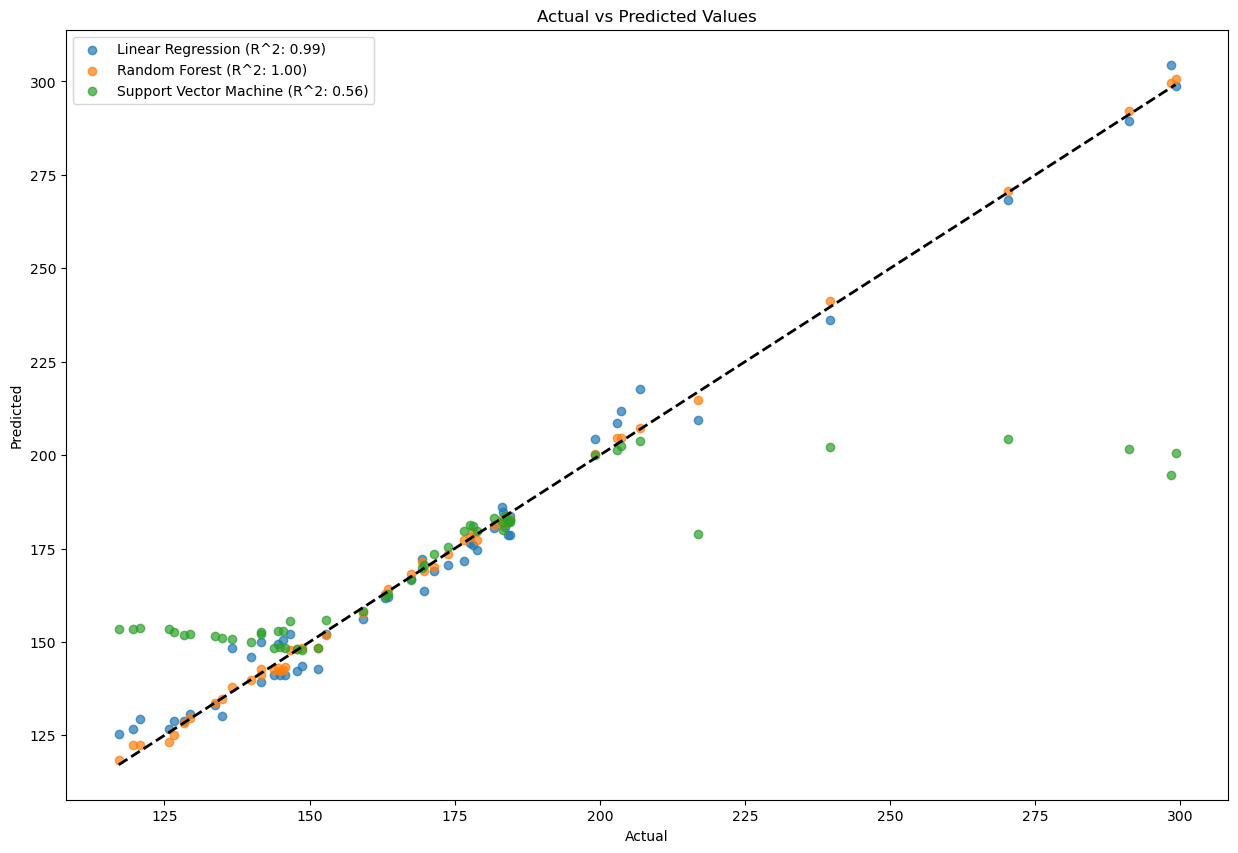

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Dictionary to store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_valid)
    score = r2_score(y_valid, pred)
    results[name] = {
        "model": model,
        "predictions": pred,
        "r2_score": score
    }
    print(f"The r2_score for {name} is: {score}")

# Visualization
plt.figure(figsize=(15, 10))
for name, result in results.items():
    plt.scatter(y_valid, result["predictions"], label=f"{name} (R^2: {result['r2_score']:.2f})", alpha=0.7)

plt.plot([y_valid.min(), y_valid.max()], [y_valid.min(), y_valid.max()], 'k--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()

In [14]:
#Saving Model
import joblib
model = models["Random Forest"]
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
# Validate the model
pred = model.predict(X_valid)
score = r2_score(y_valid, pred)
print(f"The r2_score for the validation set is: {score}")

The r2_score for the validation set is: 0.9988571099789232


#### Script for user prediction

In [13]:
import joblib
import numpy as np

# Load the trained Random Forest model and fitted scaler
model = joblib.load('random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

def get_user_input():
    """
    Function to collect user input for the independent variables.
    Keeps asking for input until valid numeric values are provided.
    """
    while True:
        try:
            Per_Capita_GDP = float(input("Enter Per Capita GDP: "))
            CPI = float(input("Enter CPI: "))
            UNRATE = float(input("Enter Unemployment Rate: "))
            Cons_Materials = float(input("Enter Consumer Materials Index: "))
            FEDFUNDS = float(input("Enter Federal Funds Rate: "))
            Num_Households = float(input("Enter Number of Households: "))
            Subsidy = float(input("Enter Subsidy Amount: "))
            
            return np.array([[Per_Capita_GDP, CPI, UNRATE, Cons_Materials, FEDFUNDS, Num_Households, Subsidy]])
        except ValueError:
            print("Invalid input. Please enter numeric values.")

def predict_CSUSHPISA(model, scaler, input_data):
    """
    Function to predict CSUSHPISA using the Random Forest model.
    """
    # Scale the input data using the fitted scaler
    input_data_scaled = scaler.transform(input_data)
    # Predict using the scaled input data
    prediction = model.predict(input_data_scaled)
    return prediction[0]

if __name__ == "__main__":
    print("Welcome to the CSUSHPISA Prediction Tool")
    user_input = get_user_input()
    prediction = predict_CSUSHPISA(model, scaler, user_input)
    print(f"The predicted CSUSHPISA value is: {prediction}")

Welcome to the CSUSHPISA Prediction Tool


Enter Per Capita GDP:  0.984
Enter CPI:  0.243
Enter Unemployment Rate:  0.34
Enter Consumer Materials Index:  23
Enter Federal Funds Rate:  44
Enter Number of Households:  21
Enter Subsidy Amount:  45


The predicted CSUSHPISA value is: 144.15439


/Users/ankush/Documents/code/env/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
